In [148]:
import pandas as pd
import re
import inflect
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

reviews = pd.read_csv(r"/Users/charlotte/Desktop/BT4222/yelp_data.csv", encoding = "ISO-8859-1")
reviews.head()
                      
              

,restaurant,content,stars,date
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00


In [149]:
reviews.tail()

,restaurant,content,stars,date
10121,Ocean Curry Fish Head,I'm surprised at how good the fish head curry ...,5,2016-01-31T00:00:00
10122,Ocean Curry Fish Head,Absolutely yummy goodness. ÃÂ The restaurant ...,4,2018-07-01T00:00:00
10123,Ocean Curry Fish Head,$45 for 2... curry fishhead plus 3 side dishes...,4,2014-12-31T00:00:00
10124,Ocean Curry Fish Head,I'll be frank to say that the food is not chea...,4,2014-12-31T00:00:00
10125,Shan E Punjab,This is hawker stall food at its finest. We ha...,5,2018-07-23T00:00:00


In [150]:
reviews.shape

(10126, 4)

In [160]:
# Cleaning the Data
def clean(data):
    
    # Removing leading and trailing white spaces
#     data = str(data).strip()

# add space for punctuation
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    translator.sub(' ', data)
    # Converting all text to lower case
    data = data.lower() 
    
    #remove punct
    data = re.sub('[^A-Za-z0-9]+', ' ', data)
    
    # Converting all numbers to words
#     word = data.split(' ')
#     p = inflect.engine()
#     word = ' '.join([i for i in word if not i.isdigit()])
#     word = re.sub(r'\d+', p.number_to_words(word) , word) 

#     translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
#     # Removing Punctuation
#     #word = data.split(' ')
#     translator = str.maketrans('', '', string.punctuation)
#     data = data.translate(translator)

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(data)
    data = ' '.join([i for i in tokens if not i in stop_words])

    return data

# clean text data
reviews['content_clean'] = reviews['content'].apply(lambda x: clean(x))
reviews.head()



,restaurant,content,stars,date,content_clean
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00,food phenomenal laksa awesome cheap yet heavy
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00,got hawker center immediately saw sungei road ...
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00,laksa popular southeast asia spicy noodle soup...
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00,laska thing trying still thing love noodles so...
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00,laksa good tasty rich flavor line always long ...


In [163]:
reviews.head()

,restaurant,content,stars,date,content_clean
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00,food phenomenal laksa awesome cheap yet heavy
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00,got hawker center immediately saw sungei road ...
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00,laksa popular southeast asia spicy noodle soup...
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00,laska thing trying still thing love noodles so...
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00,laksa good tasty rich flavor line always long ...


In [164]:
reviews['content_clean']

0            food phenomenal laksa awesome cheap yet heavy
1        got hawker center immediately saw sungei road ...
2        laksa popular southeast asia spicy noodle soup...
3        laska thing trying still thing love noodles so...
4        laksa good tasty rich flavor line always long ...
                               ...                        
10121    surprised good fish head curry friend told age...
10122    absolutely yummy goodness restaurant located l...
10123    45 2 curry fishhead plus 3 side dishes decent ...
10124    frank say food cheap flavour afterall famous c...
10125    hawker stall food finest fresh hot chili garli...
Name: content_clean, Length: 10126, dtype: object

In [165]:
grouped = reviews.groupby(reviews.restaurant)
grouped

In [166]:
# Cleaning restaurant name 
def clean_rest(data):
    #keep english word 
    data = re.sub(r'[^\x00-\x7F]+', '',data)
    return data
    


reviews['restaurant'] = reviews['restaurant'].apply(lambda x: clean_rest(x))
reviews.head()


,restaurant,content,stars,date,content_clean
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00,food phenomenal laksa awesome cheap yet heavy
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00,got hawker center immediately saw sungei road ...
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00,laksa popular southeast asia spicy noodle soup...
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00,laska thing trying still thing love noodles so...
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00,laksa good tasty rich flavor line always long ...


In [167]:
grouped = reviews.groupby('restaurant')
grouped.describe()

stars                                               
                    count      mean       std  min   25%  50%   75%  max
restaurant                                                              
 Mongkok Dim Sum      9.0  3.888889  1.054093  2.0  3.00  4.0  5.00  5.0
10 at Claymore       12.0  4.166667  0.577350  3.0  4.00  4.0  4.25  5.0
126 Eating House      2.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0
13 STAGES             1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
13% Gastro Wine       3.0  4.333333  0.577350  4.0  4.00  4.0  4.50  5.0
...                   ...       ...       ...  ...   ...  ...   ...  ...
Zhong Hua Steamboat   1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
edge                  2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0
hans im glck         11.0  4.272727  1.009050  2.0  4.00  5.0  5.00  5.0
iO Italian Osteria   18.0  4.166667  1.294786  1.0  4.00  5.0  5.00  5.0
timbre+              18.0  3.333333  0.970143  2.0  3.00  3.0  4.00  5.0

[770 rows x 8 columns]

In [170]:
# To get restaurant name and respective reviews

restaurant_names = []
for rest in reviews["restaurant"]: # each restaurant name
    if rest not in restaurant_names: 
        restaurant_names.append(rest)

reviewsByRestaurant = dict.fromkeys(restaurant_names, "")
for rest in restaurant_names: 
    filtered= []
    filtered= reviews['content_clean'][reviews['restaurant'] == rest]
    for rev in filtered: 
        reviewsByRestaurant[rest] += rev
        reviewsByRestaurant[rest] += " "



reviews_by_restaurant = pd.DataFrame.from_dict(reviewsByRestaurant, orient="index", columns= ["compiled"])
reviews_by_restaurant = reviews_by_restaurant.reset_index()
reviews_by_restaurant = reviews_by_restaurant.rename(columns={"index": "restaurants"})

reviews_by_restaurant.head()
#reviews_by_restaurant.iloc[0]["compiled"]

,restaurants,compiled
0,Sungei Road Laksa,food phenomenal laksa awesome cheap yet heavy ...
1,Holycrab,first seafood meal favorite family loves takin...
2,Tian Tian Hainanese Chicken Rice,else said super popular tian tian chicken rice...
3,Song Fa Bak Kut Teh,thanks yelp directing restaurant first meal si...
4,Jumbo Seafood,three things buds red dot said must try tian t...


In [173]:
reviews_by_restaurant.head(20)

,restaurants,compiled
0,Sungei Road Laksa,food phenomenal laksa awesome cheap yet heavy ...
1,Holycrab,first seafood meal favorite family loves takin...
2,Tian Tian Hainanese Chicken Rice,else said super popular tian tian chicken rice...
3,Song Fa Bak Kut Teh,thanks yelp directing restaurant first meal si...
4,Jumbo Seafood,three things buds red dot said must try tian t...
5,National Kitchen By Violet Oon,dining real treat enjoyed venue much located i...
6,Liao Fan Hawker Chan,although place overhyped expecting much experi...
7,Din Tai Fung,go place xiao long bao daughter love dtf many ...
8,Khansama Tandoori,hiked 2 miles hotel little india get worth wal...
9,Tim Ho Wan,lunch family place restaurant nice dining ambi...


In [172]:

reviews_by_restaurant.to_csv(r"/Users/charlotte/Desktop/BT4222/reviews_rest.csv")

In [174]:
docs_test=reviews_by_restaurant['compiled'].tolist()

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words=newlist
cv= CountVectorizer(max_df=0.85,max_features=10000, stop_words=newlist, ngram_range = (1, 2))
word_count_vector=cv.fit_transform(docs_test)
#docs=reviews_by_restaurant['compiled'].tolist()
#word_count_vector=cv.fit_transform(docs)

/Users/charlotte/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adam', 'aji', 'allauddin', 'ao', 'arnold', 'ba', 'baanthai', 'bari', 'bern', 'bong', 'collin', 'fatboy', 'fynn', 'gerry', 'granny', 'gyoza', 'huber', 'jaggi', 'joan', 'kanai', 'ki', 'koshi', 'lawry', 'lola', 'luke', 'maki', 'mama', 'margarita', 'mohgan', 'muthu', 'nirai', 'operetta', 'oscar', 'ruth', 'sakunthala', 'samy', 'san', 'sarn', 'shanthee', 'sho', 'ter', 'timbre', 'tolido', 'tsuru', 'uma', 'victor', 'vientiane', 'werner', 'wheeler'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [209]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [210]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [211]:
# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()
 
# # get the document that we want to extract keywords from
# doc=docs_test[0]
 
# #generate tf-idf for the given document
# tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
 
# #sort the tf-idf vectors by descending order of scores
# sorted_items=sort_coo(tf_idf_vector.tocoo())
 
# #extract only the top n; n here is 10
# keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results

for i in docs_test:
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([i]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    for k in keywords:
        print(k, keywords[k])
    print("\n===next===")


    

# print("\n=====Doc=====")
# print(doc)
# print("\n===Keywords===")
# for k in keywords:
#     print(k,keywords[k])

bowl 0.467
cockles 0.361
chopsticks 0.236
bowls 0.233
broth 0.143
small 0.141
spicy 0.129
spoon 0.127
small bowl 0.125
line 0.102

===next===
chili 0.328
crabs 0.206
pepper 0.174
soak sauce 0.146
chilli 0.13
get 0.124
soak 0.112
also 0.102
service 0.1
recommended friend 0.098

===next===
line 0.339
maxwell 0.26
bourdain 0.192
sauce 0.19
wait 0.162
anthony 0.16
anthony bourdain 0.157
stalls 0.135
tender 0.123
maxwell center 0.11

===next===
broth 0.324
peppery 0.286
bkt 0.215
refill 0.187
bone 0.178
refills 0.143
get 0.133
pepper 0.123
tender 0.123
tea 0.118

===next===
chili 0.513
pepper 0.251
crabs 0.199
chilli 0.144
sauce 0.144
cereal 0.125
get 0.111
service 0.101
prawns 0.099
ordered 0.099

===next===
keluak 0.233
buah keluak 0.216
buah 0.213
museum 0.208
dishes 0.131
rendang 0.127
sambal 0.125
sauce 0.113
dish 0.111
beng 0.102

===next===
michelin 0.405
soya 0.364
sauce 0.228
line 0.223
soya sauce 0.185
soy sauce 0.179
soy 0.176
siew 0.15
cheapest michelin 0.136
cheapest 0.117

===

hands 0.29
cutlery 0.246
fire 0.239
tekka 0.204
stands 0.14
mutton 0.11
gravy 0.107
forks 0.104
plastic 0.103
onto 0.093

===next===
quay 0.308
live music 0.298
clark quay 0.211
clark 0.211
coolest 0.205
music 0.184
clarke quay 0.177
clarke 0.177
live 0.16
spots 0.144

===next===
stalls 0.362
carrot 0.278
center 0.194
breakfast 0.191
great breakfast 0.17
start day 0.121
bad though 0.121
also 0.115
though 0.108
every week 0.108

===next===
tolido 0.398
pancakes 0.378
breakfast 0.241
latte 0.18
eggs 0.17
pandan 0.155
bacon 0.128
brunch 0.11
cream 0.11
scrambled 0.107

===next===
scooped 0.255
century egg 0.217
preparing 0.202
century 0.202
carrot 0.173
stock 0.171
asked 0.168
onions 0.148
told wait 0.138
inn 0.138

===next===
great chill 0.619
wasabi 0.481
chill 0.424
prawns 0.316
dessert 0.277
great 0.169

===next===
siew 0.536
00 0.163
salted egg 0.158
besar 0.124
salted 0.121
egg yolk 0.107
hor 0.097
yolk 0.096
siu 0.096
egg 0.088

===next===
durian 0.415
keluak 0.198
gong 0.182
buah 

croissant 0.319
ravioli 0.229
waited mins 0.132
service 0.132
eggs 0.13
inside also 0.13
beautiful 0.127
could much 0.127
always busy 0.125
personable 0.123

===next===
pigeon 0.223
iberico 0.185
saffron 0.143
lamb 0.131
selection 0.124
crew 0.121
foie gras 0.109
elegant 0.109
foie 0.108
gras 0.108

===next===
broth 0.338
akamaru 0.229
hakata 0.133
wait 0.131
queue 0.125
mandarin 0.118
really 0.116
get 0.113
gyoza 0.109
bun 0.107

===next===
babi 0.236
buah 0.211
nonya 0.209
dish 0.183
durian 0.18
chye 0.177
assam 0.177
pong 0.15
asam 0.145
ayam buah 0.13

===next===
stores 0.307
awhile 0.286
quick cheap 0.203
time wait 0.192
snaking 0.192
brave 0.192
wait 20 0.177
20 mins 0.177
remain 0.173
foot 0.173

===next===
station 0.269
display 0.165
oysters 0.162
small 0.147
thanks 0.145
mini 0.145
portioned 0.138
lobsters 0.133
buffets 0.133
selection 0.123

===next===
brisket 0.492
meats 0.172
smoked 0.158
nachos 0.147
texas 0.143
weight 0.136
sides 0.117
establishment 0.114
texan 0.113
hous

cocktails 0.203
cocktail 0.2
latte 0.17
brunch 0.148
drinks 0.146
musubi 0.146
fort 0.136
spam 0.127
mixologist 0.112
like 0.108

===next===
rillette 0.22
onglet 0.21
souffle 0.192
upstairs 0.178
boeuf 0.16
would 0.127
waiter 0.118
com 0.106
tinyurl com 0.103
tinyurl 0.103

===next===
congee 0.408
ordered 0.133
sauce 0.131
really 0.129
pepper sauce 0.122
gao 0.119
har 0.111
pepper 0.102
silky 0.097
dishes 0.095

===next===
rating 0.261
yam 0.206
pur 0.167
suckling 0.165
soya bean 0.157
order whole 0.157
pre order 0.148
soya 0.147
homemade 0.135
bean 0.129

===next===
galbi 0.271
pancake 0.175
mama 0.16
dishes 0.14
spicy 0.133
side dishes 0.125
like 0.122
cakes 0.122
reservations 0.106
mrt 0.091

===next===
hor 0.238
paste 0.195
dishes 0.161
bean sauce 0.157
bean 0.145
wok 0.139
har 0.139
wok hei 0.13
cze 0.126
well 0.125

===next===
champagne 0.287
cereal 0.159
prawns 0.13
neighborhood 0.127
dish 0.123
yam 0.106
cereal prawns 0.104
like 0.101
dishes 0.1
waitress 0.094

===next===
pax 0

rendang 0.236
tinyurl com 0.226
tinyurl 0.226
com 0.222
keluak 0.186
buah keluak 0.167
buah 0.165
tee 0.147
pie tee 0.138
dishes 0.135

===next===
katsu 0.449
cabbage 0.301
rosu 0.258
loin 0.224
brown 0.144
set 0.137
katsu set 0.121
miso 0.115
side 0.099
80 0.09

===next===
scallops 0.171
reduction 0.163
figs 0.159
mash 0.138
tuna 0.135
tartare 0.126
ceviche 0.122
quail egg 0.119
purple 0.103
women 0.102

===next===
samy 0.516
bit 0.143
masala 0.13
spicy 0.113
lime juice 0.102
since 0.102
experience 0.099
mutton 0.099
dishes 0.099
efficient service 0.092

===next===
cheap 0.148
meats 0.145
eat 0.145
short 0.144
get 0.136
slices 0.134
marinated 0.125
united 0.121
spread 0.114
pop 0.111

===next===
fishhead 0.299
bean curd 0.269
curd 0.247
rendang 0.213
bean 0.213
amex 0.161
law 0.147
congee 0.128
mother 0.117
breakfast 0.115

===next===
parking 0.343
finding parking 0.307
cumin 0.276
hard time 0.265
service nice 0.253
sticks 0.23
eaters 0.23
draw 0.227
nice ambience 0.225
finding 0.201


bourbon 0.318
waffle 0.282
waffles 0.279
maple 0.209
mac cheese 0.177
mac 0.171
bacon 0.169
cheese 0.15
bourbon maple 0.139
pulled 0.13

===next===
hummus 0.428
middle eastern 0.214
eastern 0.201
kebab 0.155
wrap 0.139
middle 0.129
falafel 0.125
service charge 0.123
wraps 0.121
baba 0.119

===next===
naan 0.367
paneer 0.283
butter 0.194
masala 0.125
looks 0.113
friendly 0.103
came 0.095
dishes 0.095
quite 0.094
restaurants 0.091

===next===
chilli oil 0.265
another great 0.261
chilli 0.189
mine 0.166
spicy 0.155
intestine 0.153
time favourite 0.142
chilli chilli 0.142
excellent experience 0.139
smack 0.134

===next===
potter 0.521
harry potter 0.521
harry 0.469
theme 0.13
themed 0.096
like 0.084
pesto 0.073
menu 0.072
cinnamon 0.072
drinks 0.066

===next===
music 0.295
beautiful 0.259
listening 0.259
background music 0.259
affordable prices 0.243
vendors 0.233
approached 0.233
start 0.231
attraction 0.223
let start 0.216

===next===
cheese 0.179
pasta 0.177
starsthe 0.169
entertainer 0

local 0.304
straits 0.258
hyatt 0.249
breakfast 0.176
station 0.152
stations 0.143
dan 0.139
malay 0.124
buffets 0.122
local fare 0.12

===next===
great value 0.186
value 0.161
really 0.156
sets 0.155
ingredients 0.152
mala 0.132
luncheon 0.129
celebrate birthday 0.129
really find 0.127
finer 0.127

===next===
course 0.252
service 0.169
completely 0.149
tea time 0.132
start finish 0.132
like must 0.132
service extremely 0.13
left full 0.13
amazing highly 0.13
recommended great 0.127

===next===
antipasti 0.239
figs 0.223
tried make 0.215
get choose 0.211
newly opened 0.208
last minute 0.205
yoghurt 0.199
special occasions 0.199
pricey worth 0.199
benedict 0.183

===next===
raffles 0.232
basement 0.223
miguel 0.192
drinking 0.135
colleagues 0.134
photo 0.134
know 0.129
apparently 0.114
night 0.108
mostly 0.104

===next===
expats 0.188
downstairs 0.181
quay 0.159
though pretty 0.144
beers 0.143
chip 0.139
fight 0.129
high side 0.124
salmon 0.121
would 0.116

===next===
pool 0.29
oriented

spinach 0.118
skin 0.109

===next===
mushrooms 0.263
salted egg 0.162
corn 0.162
birthday 0.153
month 0.152
variety 0.151
16 90 0.128
waiter 0.125
came close 0.125
annoyance 0.125

===next===
lawry 0.662
yorkshire 0.237
yorkshire pudding 0.213
spinning 0.185
pudding 0.12
medium 0.094
creamed spinach 0.087
spinach 0.081
usda 0.08
creamed 0.076

===next===
brisket 0.623
texas 0.248
mac cheese 0.201
mac 0.194
cornbread 0.159
pulled 0.153
beans 0.106
cheese 0.105
grams 0.086
sandwich 0.082

===next===
waffles 0.491
4pm 0.199
might get 0.196
8am 0.196
belgian 0.193
starbucks 0.184
holland 0.184
desk 0.184
better value 0.184
10am 0.182

===next===
michelin 0.416
service 0.158
worth 0.097
dishes 0.096
restaurants 0.094
starter 0.093
bland 0.091
tikka 0.089
things 0.089
elegant 0.088

===next===
century egg 0.262
century 0.245
salads 0.204
found 0.179
every 0.17
least week 0.163
mornings 0.16
prices cheap 0.157
blow away 0.157
egg also 0.154

===next===
keluak 0.457
buah keluak 0.457
buah 0.45

===next===
fries 0.193
nyc 0.176
amoy 0.171
beers 0.144
sgd 0.13
cheeseburger 0.125
also 0.118
alley 0.111
selection 0.107
better 0.106

===next===
gula melaka 0.286
tea 0.286
melaka 0.281
gula 0.281
tea set 0.266
pandan 0.207
filter 0.178
clever 0.153
fancy 0.134
syrup 0.124

===next===
dan 0.51
dan dan 0.275
chili 0.242
chili oil 0.225
try got 0.135
cod 0.132
got say 0.13
oil 0.124
zhi 0.124
decide 0.123

===next===
foie 0.298
truffle 0.243
egg 0.186
oysters 0.15
foie gras 0.15
gras 0.148
building 0.139
onsen egg 0.137
onsen 0.135
runny egg 0.133

===next===
mexican 0.5
fajitas 0.284
margarita 0.253
margaritas 0.202
salsa 0.184
tinyurl com 0.136
tinyurl 0.136
com 0.133
tex mex 0.133
mex 0.133

===next===
mock 0.359
options 0.172
dosa 0.171
masala 0.168
mutton 0.16
dishes 0.138
tikka 0.129
paneer 0.127
menu 0.126
non veg 0.117

===next===
80 0.177
mrt 0.173
value money 0.166
location right 0.162
chirashi 0.158
dhoby ghaut 0.155
nett 0.152
ghaut 0.152
dhoby 0.152
nine 0.149

===next===

chili garlic 0.319
tikka masala 0.293
great find 0.272
aloo 0.272
garlic naan 0.269
finest 0.266
tikka 0.263
masala 0.229
tourists 0.186

===next===


In [183]:
restaurant_names = [x.lower() for x in restaurant_names]

In [184]:
restaurant_names

['sungei road laksa',
 'holycrab',
 'tian tian hainanese chicken rice',
 'song fa bak kut teh',
 'jumbo seafood',
 'national kitchen by violet oon',
 'liao fan hawker chan',
 'din tai fung',
 'khansama tandoori',
 'tim ho wan',
 'corner house',
 'coriander leaf',
 'vatos urban tacos',
 'hong kong style chee cheong fun',
 'burnt ends',
 'the coconut club',
 'zhong guo la mian xiao long bao',
 '328 katong laksa',
 'hokkaido ramen santouka',
 'wee nam kee chicken rice',
 'justin flavours of asia',
 'komala vilas restaurant',
 'edge',
 'old airport road food centre',
 'spago by wolfgang puck',
 'usman restaurant',
 'sawadee thai cuisine',
 'blanco court prawn mee',
 'tai hwa pork noodle',
 'zam zam restaurant',
 'a noodle story',
 'outram park fried kway teow mee',
 'tanglin food hall',
 'mtr 1924',
 'the naked finn',
 'hainanese delicacy chicken rice',
 'hong kong street family restaurant',
 'kailash parbat',
 'the banana leaf apolo',
 'shake shack',
 'swee choon tim sum',
 'two men bagel

In [185]:

newlist = [word for line in restaurant_names for word in line.split()]

In [186]:
newlist

['sungei',
 'road',
 'laksa',
 'holycrab',
 'tian',
 'tian',
 'hainanese',
 'chicken',
 'rice',
 'song',
 'fa',
 'bak',
 'kut',
 'teh',
 'jumbo',
 'seafood',
 'national',
 'kitchen',
 'by',
 'violet',
 'oon',
 'liao',
 'fan',
 'hawker',
 'chan',
 'din',
 'tai',
 'fung',
 'khansama',
 'tandoori',
 'tim',
 'ho',
 'wan',
 'corner',
 'house',
 'coriander',
 'leaf',
 'vatos',
 'urban',
 'tacos',
 'hong',
 'kong',
 'style',
 'chee',
 'cheong',
 'fun',
 'burnt',
 'ends',
 'the',
 'coconut',
 'club',
 'zhong',
 'guo',
 'la',
 'mian',
 'xiao',
 'long',
 'bao',
 '328',
 'katong',
 'laksa',
 'hokkaido',
 'ramen',
 'santouka',
 'wee',
 'nam',
 'kee',
 'chicken',
 'rice',
 'justin',
 'flavours',
 'of',
 'asia',
 'komala',
 'vilas',
 'restaurant',
 'edge',
 'old',
 'airport',
 'road',
 'food',
 'centre',
 'spago',
 'by',
 'wolfgang',
 'puck',
 'usman',
 'restaurant',
 'sawadee',
 'thai',
 'cuisine',
 'blanco',
 'court',
 'prawn',
 'mee',
 'tai',
 'hwa',
 'pork',
 'noodle',
 'zam',
 'zam',
 'restaura

In [199]:
df = pd.DataFrame(newlist)

df.to_csv(r"/Users/charlotte/Desktop/BT4222/newlist.csv")

In [204]:
import nltk 
text = reviews_by_restaurant.compiled[0]

df = nltk.pos_tag(word_tokenize(text))

In [205]:
adj_list = []

In [206]:
for i in df:
    if i[1] == 'JJ':
        adj_list.append(i[0])
        print(i)

('phenomenal', 'JJ')
('heavy', 'JJ')
('hawker', 'JJ')
('sungei', 'JJ')
('small', 'JJ')
('delicious', 'JJ')
('soup', 'JJ')
('dish', 'JJ')
('delicious', 'JJ')
('nice', 'JJ')
('protein', 'JJ')
('dish', 'JJ')
('good', 'JJ')
('laksa', 'JJ')
('laksa', 'JJ')
('popular', 'JJ')
('noodle', 'JJ')
('noodle', 'JJ')
('big', 'JJ')
('good', 'JJ')
('worth', 'JJ')
('handle', 'JJ')
('laksa', 'JJ')
('similar', 'JJ')
('laksa', 'JJ')
('small', 'JJ')
('laska', 'JJ')
('clear', 'JJ')
('popular', 'JJ')
('small', 'JJ')
('good', 'JJ')
('small', 'JJ')
('utensils', 'JJ')
('available', 'JJ')
('able', 'JJ')
('spoonful', 'JJ')
('noodle', 'JJ')
('wrong', 'JJ')
('flavorful', 'JJ')
('good', 'JJ')
('rich', 'JJ')
('fast', 'JJ')
('small', 'JJ')
('fish', 'JJ')
('slurp', 'JJ')
('delicious', 'JJ')
('worth', 'JJ')
('popular', 'JJ')
('online', 'JJ')
('sizable', 'JJ')
('large', 'JJ')
('speaks', 'JJ')
('delicious', 'JJ')
('small', 'JJ')
('small', 'JJ')
('strong', 'JJ')
('overall', 'JJ')
('strong', 'JJ')
('heavy', 'JJ')
('tiny', 'J

In [88]:
tokens = [i.split() for i in tokens_without_sw]

In [89]:
tokens

[['phenomenal'],
 ['cheap'],
 ['small'],
 ['delicious'],
 ['delicious'],
 ['nice'],
 ['protein'],
 ['popular'],
 ['worth'],
 ['handle'],
 ['similar'],
 ['small'],
 ['bowllaska'],
 ['clear'],
 ['popular'],
 ['small'],
 ['small'],
 ['utensils'],
 ['available'],
 ['able'],
 ['spoonful'],
 ['wrong'],
 ['flavorful'],
 ['ã\x82â'],
 ['alarmed'],
 ['rich'],
 ['fast'],
 ['small'],
 ['slurp'],
 ['delicious'],
 ['worth'],
 ['popular'],
 ['online'],
 ['sizable'],
 ['large'],
 ['popularitythe'],
 ['delicious'],
 ['small'],
 ['small'],
 ['didnt'],
 ['strong'],
 ['overall'],
 ['strong'],
 ['heavy'],
 ['tiny'],
 ['bowlfor'],
 ['delicious'],
 ['first'],
 ['small'],
 ['small'],
 ['popular'],
 ['organize'],
 ['cheap'],
 ['uniform'],
 ['chili'],
 ['eat'],
 ['dish'],
 ['slurp'],
 ['affordable'],
 ['small'],
 ['creamy'],
 ['create'],
 ['sublime'],
 ['freshness'],
 ['inhale'],
 ['sambal'],
 ['worth'],
 ['amazing'],
 ['entertain'],
 ['many'],
 ['delicious'],
 ['yellow'],
 ['funny'],
 ['slurp'],
 ['bad'],
 ['t

In [196]:
tokens_without_sw = [word for word in adj_list if word in newlist]

In [197]:
tokens_without_sw


['hawker',
 'sungei',
 'soup',
 'good',
 'laksa',
 'laksa',
 'noodle',
 'noodle',
 'big',
 'good',
 'laksa',
 'laksa',
 'good',
 'noodle',
 'good',
 'fish',
 'laksa',
 'fish',
 'big',
 'laksa',
 'charcoal',
 'herbs',
 'raw',
 'little',
 'little',
 'authentic',
 'noodle',
 'american',
 'little',
 'good',
 'good',
 'good',
 'real',
 'fresh',
 'hot',
 'fish',
 'little',
 'western',
 'fresh',
 'ps',
 'famous',
 'gordon',
 'laksa',
 'big',
 'stall',
 'original',
 'fish',
 'red',
 'hot',
 'big',
 'fresh',
 'noodle',
 'good',
 'good',
 'laksa',
 'laksa',
 'traditional',
 'good',
 'long',
 'traditional',
 'fish',
 'laksa',
 'white',
 'big',
 'green',
 'long',
 'good',
 'laksa',
 'awesome',
 'traditional',
 'sungei',
 'stall',
 'laksa',
 'traditional',
 'laksa',
 'fresh',
 'fresh',
 'laksa',
 'good',
 'big',
 'laksa',
 'katong',
 'big',
 'big',
 'little',
 'hot',
 'long',
 'laksa',
 'laksa',
 'good',
 'good',
 'drink',
 'old',
 'place',
 'good',
 'laksa',
 'laksa',
 'laksa',
 'authentic',
 'lak

In [207]:
from gensim import corpora
from gensim.models import LdaModel
dictionary = corpora.Dictionary(tokens)                           
corpus = [dictionary.doc2bow(text) for text in tokens]

model = LdaModel(corpus, id2word=dictionary, num_topics=4)

# Each line is a topic with individual topic terms and weights
model.show_topics(num_topics=5)

[(0,
  '0.034*"gravy" + 0.020*"flavor" + 0.017*"sweet" + 0.017*"simple" + 0.015*"didnt" + 0.015*"open" + 0.015*"order" + 0.015*"bit" + 0.013*"easy" + 0.013*"large"'),
 (1,
  '0.073*"bowl" + 0.067*"small" + 0.040*"delicious" + 0.031*"great" + 0.019*"worth" + 0.018*"bowls" + 0.017*"creamy" + 0.017*"eat" + 0.014*"strong" + 0.014*"youre"'),
 (2,
  '0.039*"spicy" + 0.023*"dont" + 0.020*"ã\x82â" + 0.019*"size" + 0.017*"small" + 0.016*"cheap" + 0.016*"finish" + 0.015*"love" + 0.014*"perfect" + 0.013*"shrimp"'),
 (3,
  '0.028*"worth" + 0.026*"dish" + 0.025*"line" + 0.021*"tasty" + 0.019*"rich" + 0.014*"singaporean" + 0.012*"chili" + 0.012*"soft" + 0.012*"thing" + 0.010*"paste"')]

In [42]:
reviews_by_restaurant.compiled[0]

'food phenomenal laksa awesome cheap yet heavygot hawker center immediately saw sungei road laksa line formed small wait got bowl delicious laksathe soup dish delicious nice coconut flavor noodles also smooth protein went well dishoverall good bowl laksa price pay would eat im singaporelaksa popular southeast asia spicy noodle soup rice noodle coconut milk curry soup im big fan curry try good definitely worth try handle heat even though dont like curry still enjoyed sungei road seems best also tried laksa colony buffet ritz carlton thought quality pretty similar laksa fraction price 3 small bowllaska thing trying still thing love noodles soup prefer simpler clear broth although im fan soup see popular flavor profile curry coconut chili ã\x82â bowls small good size youre americas think small chicken bowl size bowl soboro noodles cut utensils available spoons fits perfectly every bite easily able get spoonful noodle fish balls cakes 3sgd go wrong something flavorful ã\x82â kind food woul

In [5]:
from pathlib import Path

output_file = 'clean_yelp.csv'
output_dir = Path(r"/Users/charlotte/Desktop/BT4222")

output_dir.mkdir(parents=True, exist_ok=True)

reviews.to_csv(output_dir / output_file)  # can join path elements with / operator

In [6]:
restaurant_names = []

for i in reviews['restaurant']:
    if not i in restaurant_names:
        restaurant_names.append(i)
        
restaurant_dict = dict()

for index, i in enumerate(restaurant_names):
    restaurant_dict[i] = index
    
reviews['enum_restaurant'] = reviews['restaurant'].apply(lambda x : restaurant_dict[x])

Text(0, 0.5, 'Frequency of Reviews')

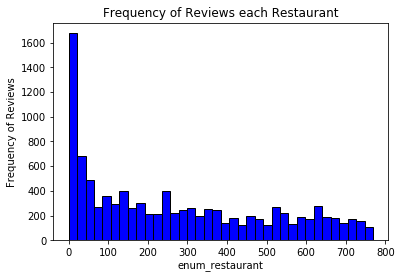

In [7]:
plt.hist(reviews['enum_restaurant'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.title("Frequency of Reviews each Restaurant")
plt.xlabel("enum_restaurant")
plt.ylabel("Frequency of Reviews")

/Users/charlotte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency of Restaurants')

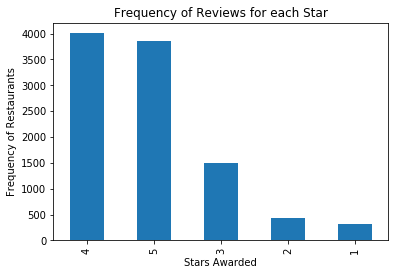

In [8]:
reviews['stars'].value_counts().plot('bar')
plt.title("Frequency of Reviews for each Star")
plt.xlabel("Stars Awarded")
plt.ylabel("Frequency of Restaurants")

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df = 0.95, min_df = 2, max_features =1000, stop_words = 'english')
df = cv.fit_transform(reviews['content_clean'])
tf_feature_names = cv.get_feature_names()

<10126x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 342302 stored elements in Compressed Sparse Row format>

In [29]:
# NMF is able to use tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(reviews['content_clean'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [30]:
nmf = NMF(n_components=4, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [34]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 50
print('nmf')
display_topics(nmf, tfidf_feature_names, no_top_words) 

print('lda')
display_topics(lda, tf_feature_names, no_top_words)

nmf
Topic 0:
zero point seven zerozero fivezero thousand price zeropm bowl order sauce dish quite person lunch like twozero meat soup queue small served fish sweet stall meal set minutes came noodles fourzero stars portion table pork beef didnt szero ordered egg pay got cream worth line cost expensive wait think day
Topic 1:
food good place great service really singapore like restaurant point nice time best menu try pretty definitely delicious little dont dishes love staff come pork bit soup ive order ordered im lunch amazing quite excellent experience dinner taste came coffee meal friendly fresh better eat recommend table got dish quality
Topic 2:
chicken rice sauce tian fried tender pork hainanese soup curry meat hawker line stall dish soy michelin fragrant best meal soya roasted ordered star point like ah spicy juicy stalls flavorful moist kee tasty delicious plate noodles fish better famous singapore skin taste ginger good tai wait crispy long tried
Topic 3:
crab chili pepper sauce

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 4, random_state = 0)
lda.fit(df)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [22]:
for index, topic in enumerate(lda.components_):
    print(f'Top 15 words for Topic #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 words for Topic #0
['best', 'place', 'fish', 'food', 'meat', 'dish', 'noodles', 'fried', 'like', 'sauce', 'soup', 'pork', 'good', 'rice', 'chicken']


Top 15 words for Topic #1
['ordered', 'dont', 'table', 'like', 'wait', 'great', 'order', 'chili', 'time', 'service', 'singapore', 'good', 'place', 'crab', 'food']


Top 15 words for Topic #2
['twozero', 'good', 'sweet', 'food', 'zeropm', 'meat', 'like', 'dish', 'sauce', 'fivezero', 'thousand', 'zerozero', 'seven', 'point', 'zero']


Top 15 words for Topic #3
['delicious', 'point', 'little', 'dishes', 'singapore', 'nice', 'menu', 'really', 'restaurant', 'like', 'service', 'great', 'place', 'good', 'food']




In [12]:
# create a document-term matrix (minus stop words) using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(reviews['content_clean'])
dtm.shape

(10126, 41765)

In [13]:
features = vect.get_feature_names()
len(features)

41765

In [14]:
import numpy as np

def summarize(id):
    
    # choose a random review that is at least 400 characters
  
    review_text = reviews['content_clean'][id]
    
    # create a list of all unique words in the review (minus stop words) using CountVectorizer
    vect = CountVectorizer(stop_words='english')
    vect.fit([review_text])
    unique_words = vect.get_feature_names()
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in unique_words:
        word_scores[word] = dtm[id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[0:5]
    for word, score in top_scores:
        print(word)
    
    # print 5 random words (for comparison)
    print('\n' + 'RANDOM WORDS:')
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # print the review
    print('\n' + review_text)

In [15]:
for i in range(0,100):
    summarize(i)

TOP SCORING WORDS:
phenomenal
heavy
laksa
cheap
awesome

RANDOM WORDS:
phenomenal
food
awesome
heavy
laksa

food phenomenal laksa awesome cheap yet heavy
TOP SCORING WORDS:
laksa
dishoverall
laksathe
bowl
formed

RANDOM WORDS:
price
center
delicious
bowl
dish

got hawker center immediately saw sungei road laksa line formed small wait got bowl delicious laksathe soup dish delicious nice coconut flavor noodles also smooth protein went well dishoverall good bowl laksa price pay would eat im singapore
TOP SCORING WORDS:
laksa
curry
colony
noodle
carlton

RANDOM WORDS:
curry
fraction
heat
popular
zero

laksa popular southeast asia spicy noodle soup rice noodle coconut milk curry soup im big fan curry try good definitely worth try handle heat even though dont like curry still enjoyed sungei road seems best also tried laksa colony buffet ritz carlton thought quality pretty similar laksa fraction price zero point three small bowl
TOP SCORING WORDS:
americas
howlin
soboro
size
alarmed

RANDOM W

TOP SCORING WORDS:
fivethree
laksa
easilyexpect
hourrepeat
expressions

RANDOM WORDS:
place
easilyexpect
win
lunch
lighter

three point five four fivethree point five four fivethree point five four fivethree point five four fivei prefer katong laksa place seem take laksa making art seriously least expressions face one size small lighter broth doesnt win easilyexpect lineup go lunch hourrepeat
TOP SCORING WORDS:
thirty
thousand
clams
bowlsim
clean

RANDOM WORDS:
threeone
bowl
worth
job
thirty

monday one thousand one hundred thirty point threeone thousand one hundred thirty point threeam wait clams fresh clean clean fresh clams worth one thousand one hundred thirty point three ordered two bowls youre used us equivalent small pho bowl order two bowlsim sure better laksa places locals job youre visiting wanted see hype
TOP SCORING WORDS:
traveling
ridiculous
pictures
sign
forward

RANDOM WORDS:
traveling
visiting
great
finish
taste

looking forward visiting place traveling singapore great

TOP SCORING WORDS:
szero
cook
laksa
city
cafe

RANDOM WORDS:
city
great
best
restaurant
szero

best laksa city restaurant even cafe place people cook great soup szero point two
TOP SCORING WORDS:
laksa
katong
cockles
chopstickswhat
clamoring

RANDOM WORDS:
spoon
tinge
enjoyed
clamoring
beautifully

laksa served like katong laksa style spoon chopstickswhat visually appealing explosion colors brimming side side redness cockles matched beautifully green parsley yellowish broththe broth light lemak like katong laksa lightness especially enjoyed tinge refreshing sweetness infused coconutty flavorsgorgeous laksathe cockles huge abundantly generous textures amazing cooked perfection noodles bean sprouts added much needed texture color wellit delicious literally half bowls one go let say rarely consume much food one go every bit laksa flavor intoxicated clamoring
TOP SCORING WORDS:
eveyone
uswe
yã
family
crabservice

RANDOM WORDS:
adults
phenomenal
favorites
yã
large

first seafood meal favori

TOP SCORING WORDS:
gingery
braving
problematic
achieves
elusive

RANDOM WORDS:
especially
food
sauce
texture
balance

okay years since yelp singapore yet still favorite hainan chicken rice ever braving long lines problematic especially tempted many food stalls maxwell food market chicken achieves elusive perfect balance cooked enough tender well done meat dry ãâ texture spot gingery sauce spicy sauce delicious ãâ miss place still
TOP SCORING WORDS:
aide
awesomejust
collecting
scallion
flavoured

RANDOM WORDS:
collecting
good
delicious
oil
scallion

never eaten delicious hainanese chicken rice chicken tender smooth rice flavoured ginger scallion oil tasted awesomejust prepared come early avoid long line even good system collecting money one aide dishes ready side
TOP SCORING WORDS:
tian
chickenstock
zerominszero
lucked
rice

RANDOM WORDS:
days
luckily
hainanese
wait
poached

friends went singapore recently planned days around eating course tian tian hainanese chicken rice list luckily

TOP SCORING WORDS:
zero
tour
chicken
rice
wait

RANDOM WORDS:
mediumsized
patience
sneak
seasoned
list

tian tian hainanese chicken rice maxwell food center one singapores busiest food stalls fans gordon ramsey anthony bourdain hainanese chicken rice short seasoned poached chicken rice served chilli sauce garnished cucumber created immigrants hainan province southern china cheap easy mealwe hit maxwell food center part tour sneak peek singapore stall wasnt part tour sampled foods stalls wait recommend tag teaming someone line moves quickly anticipate wait zero point two zero three zero five three six zerozero point two zero three zero five three six zero minutes barely got chicken time tour nearly left us behind stall sells dishes like vegetables oyster sauce cuttlefish basically come one dish famed hainanese chicken rice recommend ordering popular option mediumsized chicken rice priced zero point two zero three zero five three six zero singaporean dollars zero point two zero three zer

In [65]:
reviews['content_clean'][0]

'food phenomenal laksa awesome cheap yet heavy'

In [29]:
x = ["i", ["really", "love"], "python"] 

In [35]:
print(x[1])

['really', 'love']


In [218]:
tuple = (1, 2, 3, 4) 
tuple.append((5, 6, 7)) 
print(len(tuple)) 

AttributeError: 'tuple' object has no attribute 'append'

In [215]:
print(c)

    

[1, 2, 3, 4, 5]
